In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np


In [134]:
from datetime import datetime

flights = pd.read_csv('itineraries.csv')

flights['date'] = pd.to_datetime(flights['date'], format="%d-%m-%Y")
flights['searchDay'] = pd.to_datetime(flights['searchDay'], format="%d-%m-%Y")



In [77]:
flights.head()

flights[flights['searchDay'] == datetime.today()]

,origin,destination,date,price,link,carrier,searchDay
0,BCN,DPS,2023-07-09,692.98,https://skyscanner.pxf.io/c/2850210/1103265/13...,Qatar Airways,2023-01-14
1,DPS,BCN,2023-08-21,554.69,https://skyscanner.pxf.io/c/2850210/1103265/13...,Singapore Airlines,2023-01-14
2,BCN,KUL,2023-07-08,490.98,https://skyscanner.pxf.io/c/2850210/1103265/13...,Lufthansa,2023-01-14
3,KUL,BCN,2023-08-21,513.88,https://skyscanner.pxf.io/c/2850210/1103265/13...,Emirates,2023-01-14
4,MAD,DPS,2023-07-13,606.80,https://skyscanner.pxf.io/c/2850210/1103265/13...,Qatar Airways,2023-01-14


In [131]:
flights[flights['destination'] == 'MNL']

,origin,destination,date,price,link,carrier,searchDay
8,BCN,MNL,2023-07-09,643.02,https://skyscanner.pxf.io/c/2850210/1103265/13...,Emirates,2023-01-14
10,MAD,MNL,2023-07-08,729.98,https://skyscanner.pxf.io/c/2850210/1103265/13...,Air Europa,2023-01-14
20,BCN,MNL,2023-07-11,637.13,https://skyscanner.pxf.io/c/2850210/1103265/13...,Emirates,2023-01-15
22,MAD,MNL,2023-07-07,572.98,https://skyscanner.pxf.io/c/2850210/1103265/13...,Qatar Airways,2023-01-15


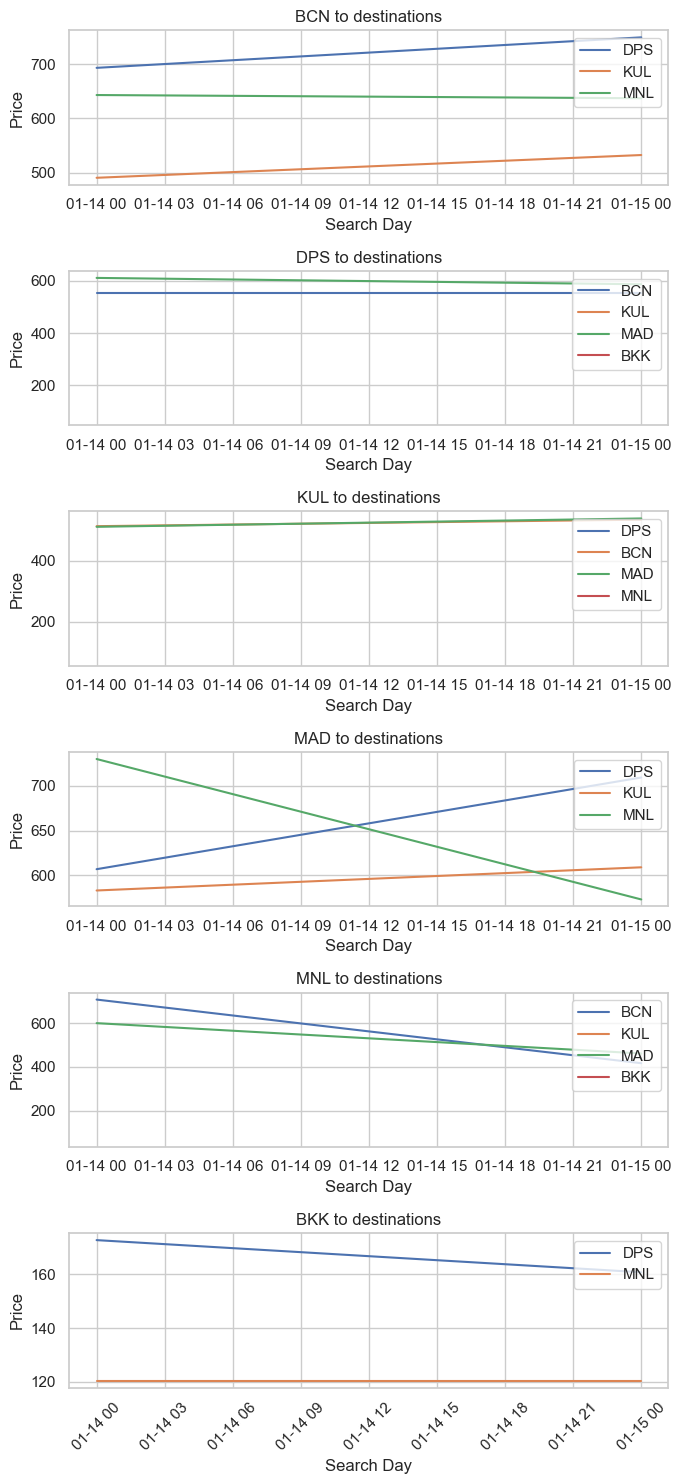

In [135]:
def plot_price_evolution_by_origin_(df):
    # Get all unique origin
    origins = df['origin'].unique()
    destinations = df['destination'].unique()

    # Create a figure with multiple subplots
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(nrows=len(origins), ncols=1, figsize=(7, 15))
    for i, origin in enumerate(origins):
        # Filter the DataFrame to only include rows with the current origin
        df_filtered = df[df['origin'] == origin]
        for destination in destinations:
            # filter the rows for each destination
            df_dest = df_filtered[df_filtered['destination'] == destination]
            # Create a line plot of the 'price' column against the 'searchDay' column
            sns.lineplot(x='searchDay', y='price', data=df_dest, label=destination, ax=axes[i])
        # Add labels to the x and y axis
        axes[i].set_xlabel('Search Day')
        axes[i].set_ylabel('Price')
        # Add a title to the plot
        axes[i].set_title(f'{origin} to destinations')
        axes[i].legend(loc='upper right')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_price_evolution_by_origin_(flights)

In [ ]:
""" Travel to Philipines """